In [1]:
# 라이브러리 추가
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 꼬꼬마 형태소 분석기
from konlpy.tag import Kkma
kkma = Kkma()

In [3]:
# '깃대종'이 언급된 카카오 블로그, 카페 글
df = pd.read_excel('D:/GEODATA/kakao_blog_cafe.xlsx', sheet_name='Sheet1').drop(['Unnamed: 0'], axis=1)
df[['title']].to_csv('D:/GEODATA/kakao_blog_cafe.txt', index=False, header=False)
f = open("D:/GEODATA/kakao_blog_cafe.txt", 'r', encoding='UTF-8')
lines = f.readlines()
f.close()

In [4]:
# 단어 2차원 리스트
dataset = []
for i in range(len(lines)):
    dataset.append(kkma.nouns(lines[i]))
dataset = [[y for y in x if not len(y)==1] for x in dataset]   # 2자 이상 
dataset = [[y for y in x if not y.isdigit()] for x in dataset] # 숫자판별
dataset[:10]

[['국립공원', '깃대', '깃대종뱃지', '21종', '모두', '획득'],
 ['호반새', '육추', '계룡', '계룡산', '깃대', '깃대종'],
 ['국립공원', '깃대', '깃대종', '식물'],
 ['깃대', '깃대종', '국립', '국립공원', '공원', '그린', '그린포인트', '포인트'],
 ['국립공원', '깃대', '깃대종뱃지', '18종'],
 ['한라산', '한라산국립공원', '국립공원', '대표', '생물', '깃대', '깃대종', '선정'],
 ['생태계', '보고', '깃대', '깃대종', '서식지'],
 ['깃대', '깃대종'],
 ['내장산', '깃대', '깃대종', '진노랑', '진노랑상사화', '상사화'],
 ['카카오', '검색', '이용', '깃대', '깃대종', '로그', '카페', '가시화']]

In [5]:
# Word2Vec 불러오기
from gensim.models.word2vec import Word2Vec

In [6]:
# 모형 구축
model = Word2Vec(dataset,
                 sg=1,           # Skip-gram 적용: 중심 단어로 주변 단어를 예측
                 window=5,       # 중심 단어로부터 좌우 5개 단어까지 학습에 적용
                 min_count=1     # 전체문서에서 최소 1회 이상 출현단어로 학습 진행
                )
model.init_sims(replace=True)

c:\users\bhyu\appdata\local\programs\python\python35\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [7]:
# 단어간 유사도
print("깃대종과 국립공원 단어간 유사도는 %.2f 입니다." % (model.wv.similarity('깃대종', '국립공원')))

깃대종과 국립공원 단어간 유사도는 0.99 입니다.


In [13]:
# 가장 유사한 단어 100개
df = pd.DataFrame(model.wv.most_similar("깃대종", topn=100), columns=['단어', '유사도'])
df.head(20)

,단어,유사도
0,국립공원,0.992329
1,환경,0.992003
2,산행,0.991687
3,대전,0.991083
4,정기,0.990947
5,공원,0.990679
6,주왕산,0.990603
7,코스,0.990359
8,여행,0.990065
9,생태,0.989881


In [9]:
kw_list = ['가야산', '경주', '계룡산', '내장산', '다도해해상',
           '덕유산', '무등산', '변산반도', '북한산', '설악산',
           '소백산', '속리산', '오대산', '월악산', '월출산',
           '주왕산', '지리산', '치악산', '태백산', '태안해안',
           '한라산', '한려해상']
df = df[df['단어'].isin(kw_list)]
df

,단어,유사도
6,주왕산,0.990603
14,지리산,0.988603
21,오대산,0.986635
23,북한산,0.986105
28,소백산,0.985644
31,무등산,0.985502
39,가야산,0.983896
40,덕유산,0.983157
62,내장산,0.978941
65,설악산,0.978398


In [10]:
# 가장 유사한 단어 100개
df1 = pd.DataFrame(model.wv.most_similar(df.iloc[0]['단어'], topn=100), columns=['단어', df.iloc[0]['단어']])
df2 = pd.DataFrame(model.wv.most_similar(df.iloc[1]['단어'], topn=100), columns=['단어', df.iloc[1]['단어']])
df3 = pd.DataFrame(model.wv.most_similar(df.iloc[2]['단어'], topn=100), columns=['단어', df.iloc[2]['단어']])
df4 = pd.DataFrame(model.wv.most_similar(df.iloc[3]['단어'], topn=100), columns=['단어', df.iloc[3]['단어']])
df5 = pd.DataFrame(model.wv.most_similar(df.iloc[4]['단어'], topn=100), columns=['단어', df.iloc[4]['단어']])
dfs = [df.set_index(['단어']) for df in [df1, df2, df3, df4, df5]]
df5 = pd.concat(dfs, join='inner', axis=1).reset_index()
df5.head(10)

,단어,주왕산,지리산,오대산,북한산,소백산
0,국립공원,0.994188,0.994269,0.991757,0.990923,0.987939
1,산행,0.994090,0.995262,0.994599,0.991812,0.990064
2,여행,0.993129,0.993178,0.991567,0.988903,0.988718
3,자연,0.992750,0.992904,0.992224,0.988385,0.987332
4,공원,0.992453,0.992348,0.992396,0.988388,0.987246
5,정기,0.992388,0.993350,0.992847,0.989935,0.986916
6,세계,0.992310,0.992275,0.990084,0.987646,0.987636
7,생태,0.992222,0.992082,0.993518,0.988773,0.987054
8,환경,0.992116,0.993075,0.991926,0.987807,0.987523
9,안내,0.991964,0.990322,0.990442,0.987435,0.985773


In [11]:
# 단어 평균 컬럼 추가
df5['전체'] = df5.mean(numeric_only=True, axis=1)
df = df5.sort_values(by='전체', ascending=False); df = df[:30]
df.head(10)

,단어,주왕산,지리산,오대산,북한산,소백산,전체
1,산행,0.994090,0.995262,0.994599,0.991812,0.990064,0.993165
0,국립공원,0.994188,0.994269,0.991757,0.990923,0.987939,0.991815
2,여행,0.993129,0.993178,0.991567,0.988903,0.988718,0.991099
5,정기,0.992388,0.993350,0.992847,0.989935,0.986916,0.991087
7,생태,0.992222,0.992082,0.993518,0.988773,0.987054,0.990729
3,자연,0.992750,0.992904,0.992224,0.988385,0.987332,0.990719
4,공원,0.992453,0.992348,0.992396,0.988388,0.987246,0.990566
8,환경,0.992116,0.993075,0.991926,0.987807,0.987523,0.990489
10,계곡,0.991812,0.993004,0.992332,0.987872,0.986451,0.990294
17,둘레,0.990530,0.993612,0.990615,0.989054,0.987127,0.990188


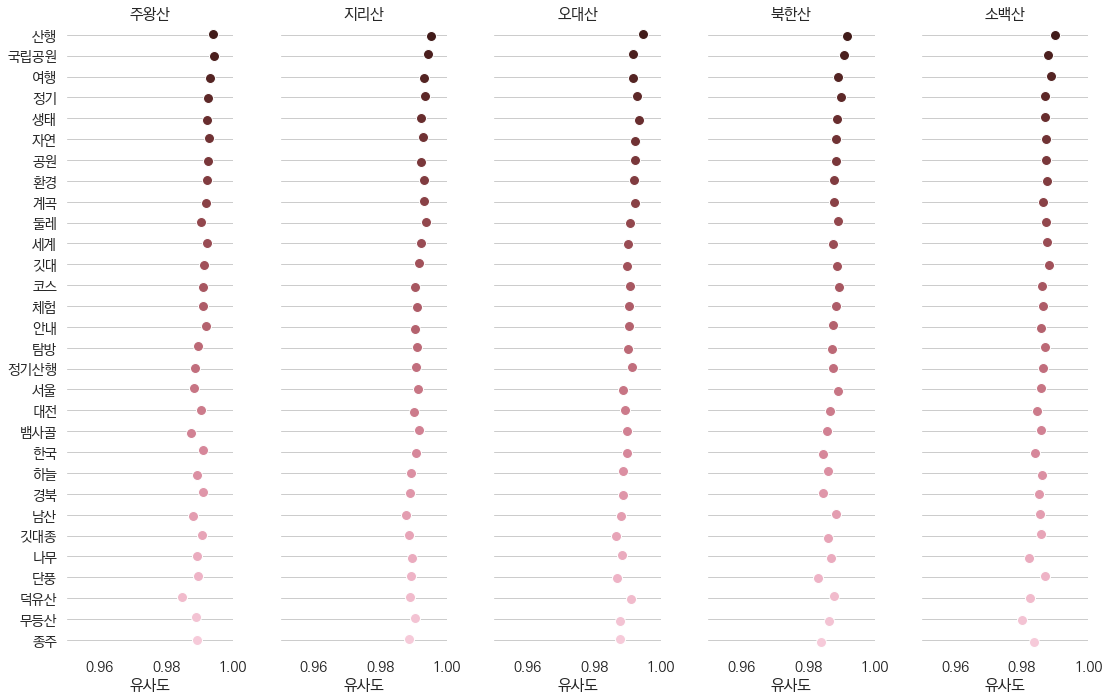

In [12]:
# 플롯 설정
sns.set(style='whitegrid', font='KoPubDotum', font_scale=1.3)
g = sns.PairGrid(df.sort_values("전체", ascending=False), x_vars=df.columns[1:6], y_vars=["단어"])
g.fig.set_size_inches(16,16)

# 스트립플롯 함수를 이용한 닷 플롯
g.map(sns.stripplot,
      size=10,
      orient="h",
      palette="ch:s=1,r=-.1,h=1_r",
      linewidth=1,
      edgecolor="w")
g.set(xlim=(0.95, 1), xlabel="유사도", ylabel="")
titles = df.columns[1:6]

for ax, title in zip(g.axes.flat, titles):
    ax.set(title=title)                        # 축 제목 설정
    ax.xaxis.grid(False); ax.yaxis.grid(True) # 수평 격자 설정

sns.despine(left=True, bottom=True)
plt.savefig('D:/GEODATA/IMG01.png', bbox_inches='tight')